# Return on Ad Spent analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('marketing_dummy_datasets/revenue_spend_summary.csv')
df.head()

,Month,Channel,Spend,Revenue
0,2025-01,Facebook,27253.45,85322.04
1,2025-01,Google Ads,16491.11,52596.80
2,2025-01,Email,20465.26,59786.81
3,2025-01,LinkedIn,6479.43,19969.65
4,2025-01,Twitter,24223.00,96533.60


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Month    30 non-null     object 
 1   Channel  30 non-null     object 
 2   Spend    30 non-null     float64
 3   Revenue  30 non-null     float64
dtypes: float64(2), object(2)
memory usage: 1.1+ KB


In [4]:
df.describe()

,Spend,Revenue
count,30.000000,30.000000
mean,15467.592667,39665.172333
std,6966.237614,21521.076380
min,5276.960000,13874.120000
25%,8982.815000,24375.850000
50%,14675.630000,32263.030000
75%,20280.320000,48892.762500
max,27798.990000,96533.600000


In [5]:
## Calculate ROAS
df['ROAS'] = df['Revenue'] / df['Spend']

## Average ROAS by Channel
roas_by_channel = df.groupby('Channel')['ROAS'].mean().sort_values(ascending = False)

## Monthly Trends
roas_trend = df.pivot(index='Month', columns='Channel', values='ROAS')

## Average Return on Ad Spent by Marketing Channel

/tmp/ipykernel_58219/1661247184.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=roas_by_channel.values, y=roas_by_channel.index, palette='viridis')


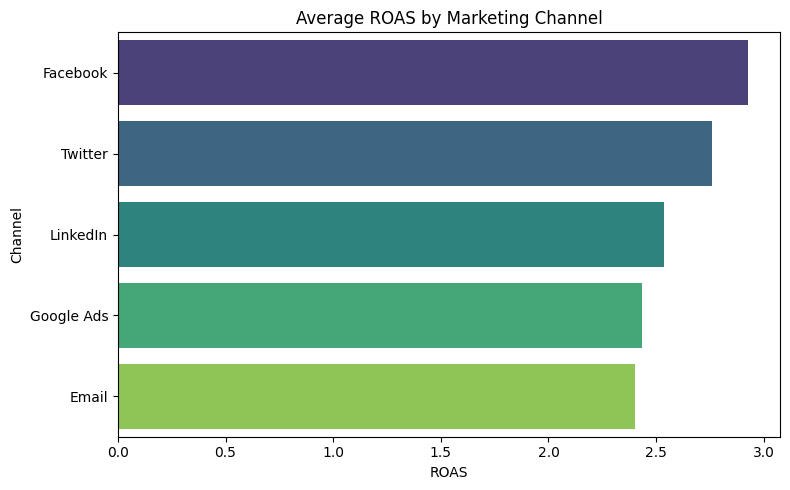

In [7]:
plt.figure(figsize=(8, 5))
sns.barplot(x=roas_by_channel.values, y=roas_by_channel.index, palette='viridis')
plt.title('Average ROAS by Marketing Channel')
plt.xlabel('ROAS')
plt.ylabel('Channel')
plt.tight_layout()
plt.show()

- **Facebook** delivers the highest ROAS (~2.95), indicating highly efficient ad spend.
- **Twitter** also performs strongly with a ROAS just under 2.8, making it a reliable channel for returns.
- **Google Ads**, **Email**, and **LinkedIn** fall in the 2.4–2.6 range — still above break-even, but slightly less efficient.

> ROAS values above 1.0 indicate positive returns. All channels are technically profitable, but some offer much better return invested.

## Monthly ROAS Trend by Channel


<Figure size 1000x600 with 0 Axes>

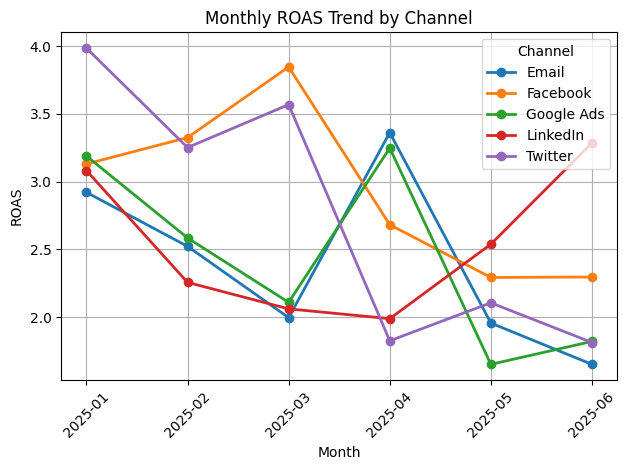

In [8]:
plt.figure(figsize=(10, 6))
roas_trend.plot(marker='o', linewidth=2)
plt.title('Monthly ROAS Trend by Channel')
plt.xlabel('Month')
plt.ylabel('ROAS')
plt.grid(True)
plt.legend(title='Channel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This line chart reveals how each channel's ROAS (Return on Ad Spend) fluctuated month over month from January to June 2025:

- **Facebook** peaked in **March** with the highest ROAS (~3.9), but declined steadily after, indicating possible campaign fatigue or rising costs.
- **Twitter** started extremely strong in **January (~4.0)** but experienced a gradual drop, stabilizing at moderate levels by June.
- **LinkedIn** displayed volatility with a **low point in April (~1.8)** and recovery in June (~3.3), suggesting inconsistent performance.
- **Google Ads** and **Email** showed **relatively stable yet modest ROAS**, with noticeable dips in **May–June**, hinting at reduced efficiency or lead quality.

> Overall, ROAS trends emphasize the need to monitor **campaign timing, seasonality**, and **channel saturation**, and to act quickly when efficiency drops.


## Conclusion

- **Facebook and Twitter** consistently delivered the highest average ROAS across the six-month period, with peak performance in March and January, respectively.
- **Email and Google Ads** showed moderate efficiency but trended downward in later months — likely due to audience fatigue or reduced campaign effectiveness.
- **LinkedIn** had the **lowest and most volatile ROAS**, dipping below 2.0 in multiple months, but rebounded slightly in June.

> All channels generated positive ROAS (>1.0), meaning they were not loss-making. However, the gap in efficiency across channels highlights optimization opportunities.

---

### Recommendations

1. **Scale High-Performing Channels**  
   - Allocate more budget to **Facebook** and **Twitter**, especially around high-performing periods like March and Q1 overall.

2. **Optimize or Pause LinkedIn Campaigns**  
   - Audit creative, audience targeting, and bidding strategies for **LinkedIn**. If improvements don’t raise ROAS consistently above 2.5, consider shifting spend elsewhere.

3. **Refresh Email and Google Ads Campaigns**  
   - Since ROAS declined in May–June, refresh ad creatives, subject lines, or offers.
   - Run **A/B tests** or adjust timing/frequency to boost efficiency.

4. **Incorporate ROAS into Monthly Budget Planning**  
   - Use ROAS thresholds (e.g., pause if <1.8, scale if >3.0) in your marketing dashboard.
   - Track monthly ROAS trends by channel to detect issues early.

5. **Combine ROAS with Lead Quality and Retention**  
   - Pair ROAS with data from **Lead Conversion** and **Churn** analysis to build a **true customer value lens** — not just upfront revenue.

> Aligning spend with proven return drivers will allow the team to maximize impact while reducing wasted investment.
